In [258]:
import pandas as pd
import os

In [259]:
all_months_data=pd.DataFrame()
file_path='D:\DOWNLOADS\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\\'
files=[file for file in os.listdir(file_path)]
for file in files:
    directory=os.path.join(file_path,file)
    df=pd.read_csv(directory)
    all_months_data=pd.concat([all_months_data,df])

In [260]:
all_months_data.to_csv(file_path+"all_data.csv",index=False)

#### Read in updated dataFrame

In [261]:
all_data=pd.read_csv(file_path+"all_data.csv")
all_data.drop_duplicates()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Augment data with additional columns

#### Task2: Add Month Column

#### Clean data

In [262]:
all_data['Month']=all_data['Order Date'].str[0:2]

In [263]:
all_data.dropna(axis=0,inplace=True)

In [264]:
temp_df=all_data[all_data['Month']!='Or']

In [265]:
all_data=temp_df

In [266]:
all_data['Month']=all_data['Month'].astype('int32')

In [267]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

##### Question 1: What was the best month for sales? How much was earned that month?

In [268]:
all_data['Total Amount']=all_data['Price Each']*all_data['Quantity Ordered']

TypeError: can't multiply sequence by non-int of type 'str'

#### Convert string to int

In [269]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

In [270]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [271]:
all_data['Sales']=all_data['Price Each']*all_data['Quantity Ordered']

In [273]:
sales_month=all_data.groupby('Month')[['Sales','Quantity Ordered']].sum().sort_values(by='Sales',ascending=False)
sales_month

,Sales,Quantity Ordered
Month,,
12,4613443.34,28114
10,3736726.88,22703
4,3390670.24,20558
11,3199603.20,19798
5,3152606.75,18667
3,2807100.38,17005
7,2647775.76,16072
6,2577802.26,15253
8,2244467.88,13448


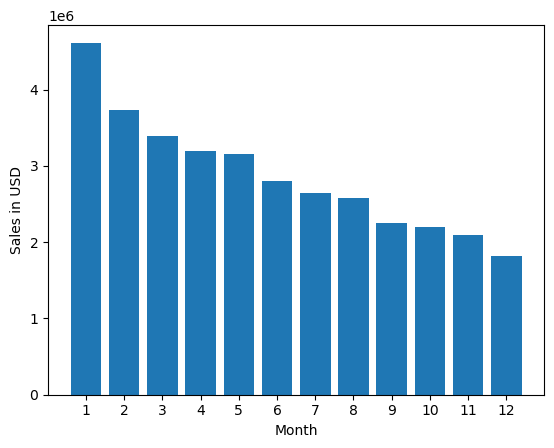

In [274]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,sales_month['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.show()

#### Question 2: Which city had the highet number of sales

In [275]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [276]:
 all_data['City']=all_data['Purchase Address']

In [277]:
all_data['City'][0].split(',')

['917 1st St', ' Dallas', ' TX 75001']

In [278]:
def extract_city(address):
    l1=address.split(',')
    return l1[1].strip();

def get_state(address):
        l1=address.split(',')
        return l1[2].strip()[0:2];

In [279]:
all_data['City']=all_data['City'].apply(lambda x: extract_city(x)+ ' ' + get_state(x))

In [280]:
all_data['City'][0]

'Dallas TX'

In [281]:
sales_city=all_data.groupby('City',as_index=False)[['Sales']].sum().sort_values(by='Sales',ascending=False)
sales_city

,City,Sales
8,San Francisco CA,8262203.91
4,Los Angeles CA,5452570.80
5,New York City NY,4664317.43
2,Boston MA,3661642.01
0,Atlanta GA,2795498.58
3,Dallas TX,2767975.40
9,Seattle WA,2747755.48
7,Portland OR,1870732.34
1,Austin TX,1819581.75
6,Portland ME,449758.27


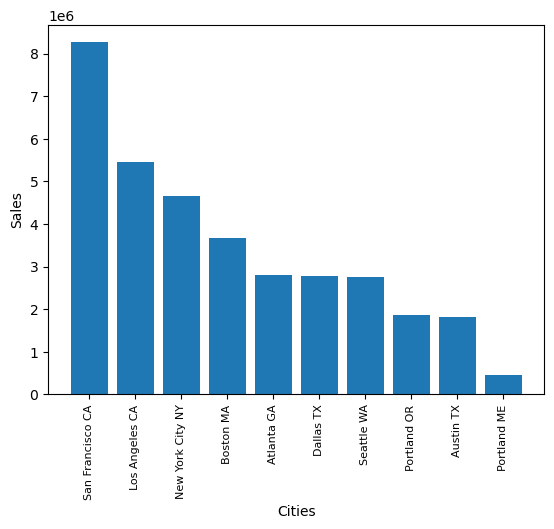

In [282]:
plt.bar(sales_city['City'],sales_city['Sales'])
plt.xticks(sales_city['City'],rotation='vertical',size=8)
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [283]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [284]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales               float64
City                 object
dtype: object

In [285]:
date=pd.to_datetime(all_data['Order Date'], format="%m/%d/%y %H:%M")
all_data['Order Date']=date

In [286]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


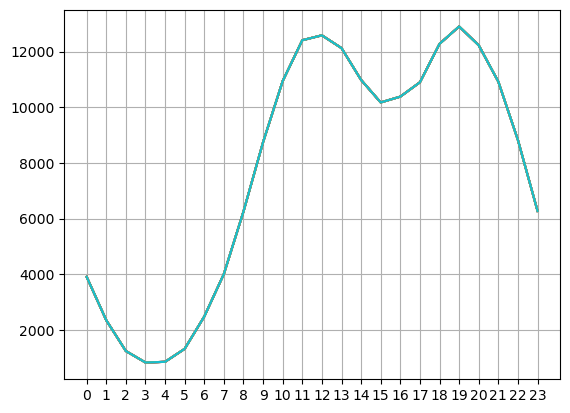

In [287]:
hours=[hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.show()

#### Question 4: What products are most often sold together?

In [288]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [289]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\amank\AppData\Local\Temp\ipykernel_7436\2929816875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [290]:
df=df[['Order ID','Grouped']].drop_duplicates()
df.head(100)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [303]:
from itertools import combinations
from collections import Counter


count=Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))



print(count.most_common(10))




[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


#### Question 5: What product sold the most? Why do you think it sold the most?

In [346]:
sales_product=all_data.groupby('Product',as_index=False)['Quantity Ordered'].sum()
sales_product

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


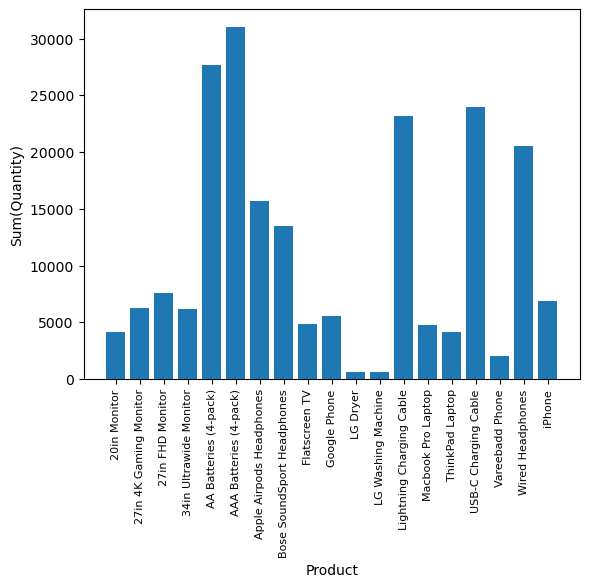

In [347]:
plt.bar(sales_product['Product'],sales_product['Quantity Ordered'])
plt.xticks(rotation='vertical',size=8)
plt.ylabel('Sum(Quantity)')
plt.xlabel('Product')
plt.show()

In [348]:
prices=all_data.groupby(['Product'],as_index=False)['Price Each'].mean()
prices

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


C:\Users\amank\AppData\Local\Temp\ipykernel_7436\4096759582.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sales_product['Product'],rotation='vertical')


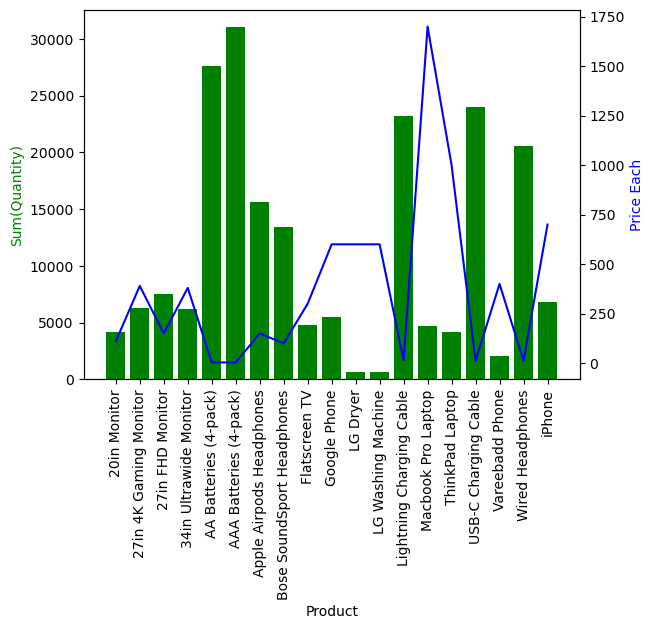

In [350]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(sales_product['Product'],sales_product['Quantity Ordered'],color='g')
ax2.plot(sales_product['Product'],prices['Price Each'], 'b-')
ax1.set_xlabel('Product')
ax1.set_ylabel('Sum(Quantity)', color='g')
ax2.set_ylabel('Price Each', color='b')
ax1.set_xticklabels(sales_product['Product'],rotation='vertical')
plt.show()